Machine Learning

https://www.kaggle.com/code/vikasukani/breast-cancer-prediction-using-machine-learning#2.-Exploring-Data-Analysis

In [10]:

# importação de libs

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

##pd.options.display.max_columns = 100 # seta maxima


In [11]:
df = pd.read_csv("/content/breast_cancer_dataset.csv")

df.head() #
df.shape # avaliamos quantidade de features e registros do dataset


(569, 33)

In [12]:
df.info() # a maior parte das features são float, devido a natureza do tamanho das células avaliadas.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
df.isna().sum() # a feature 'unnamed' é composta apenas por valores nulos
df.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
# realiamos a tratativa para retirar valores vazios:
df = df.dropna(axis='columns')

In [15]:
df.describe(include="O") # utilizamos para ver o unico objeto do dataset
# e vimos que a coluna diagnosis possui apenas 2 valores uniques:

#   Diagnosis (M = malignant, B = benign)

df.diagnosis.value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

In [16]:
diagnosis_unique = df.diagnosis.unique()
diagnosis_unique
df.diagnosis.value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

In [17]:
# Visualização dos Dados

#Libs

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')


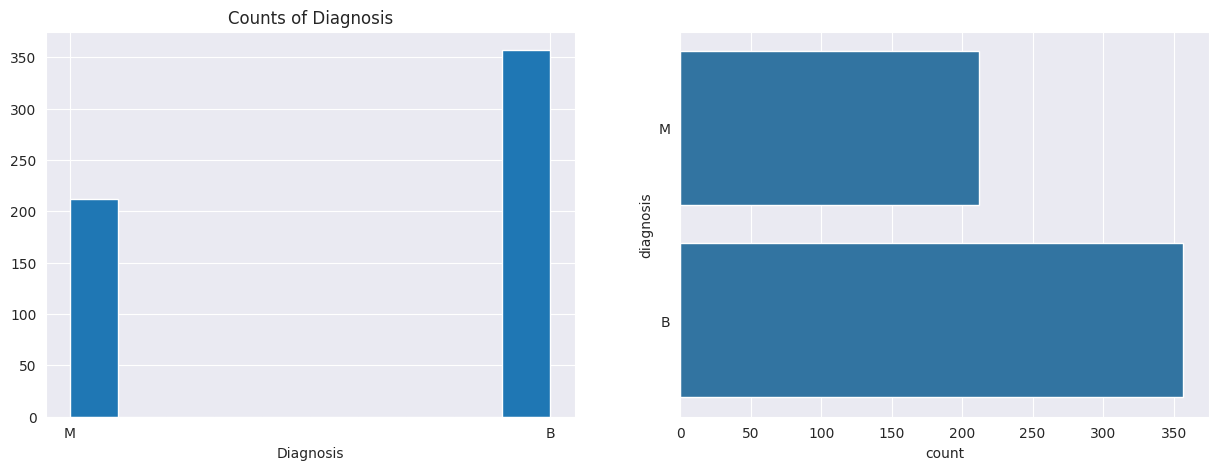

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist( df.diagnosis)
# plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")


plt.subplot(1, 2, 2)



sns.countplot(df.diagnosis); # ";" to remove output like this > <matplotlib.axes._subplots.AxesSubplot at 0x7f3a1dddba50>

# plt.show()

In [19]:
# plt.figure(figsize=(7,12))
px.histogram(df, x='diagnosis')
# plt.show()

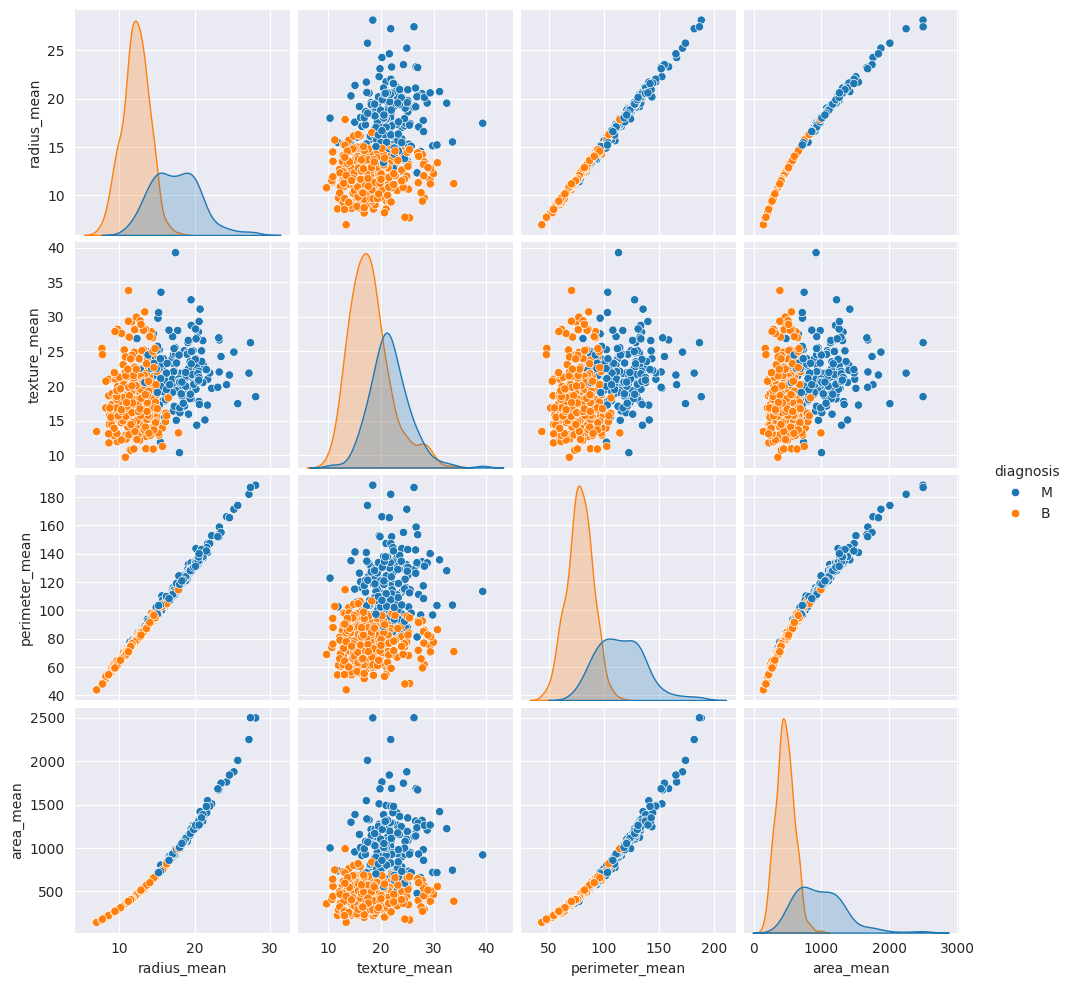

In [20]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(df[cols], hue="diagnosis")
plt.show()

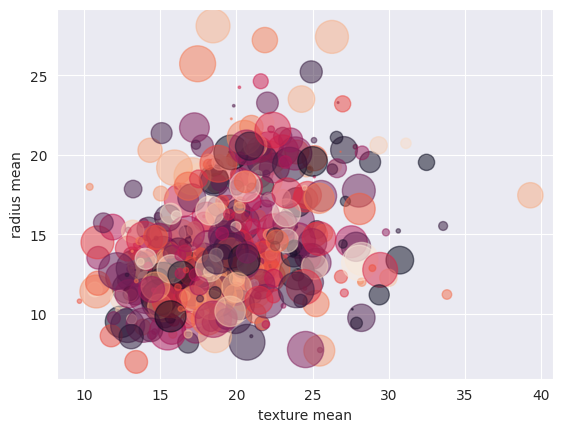

In [21]:
size = len(df['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean")
plt.scatter(df['texture_mean'], df['radius_mean'], s=area, c=colors, alpha=0.5);


In [22]:
# temos uma feature categorica, sendo assim devemos realizar a conversão dos valores para númerico

from sklearn.preprocessing import LabelEncoder #label encoder pode ser utilizado para normalizar valores

labelencoder_Y = LabelEncoder()
df.diagnosis = labelencoder_Y.fit_transform(df.diagnosis)


In [23]:
df.head(2)
print(df.diagnosis.value_counts())
print("\n", df.diagnosis.value_counts().sum())

# 0 = benign
# 1 = malignant

diagnosis
0    357
1    212
Name: count, dtype: int64

 569


In [24]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
df[cols].corr()

11


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


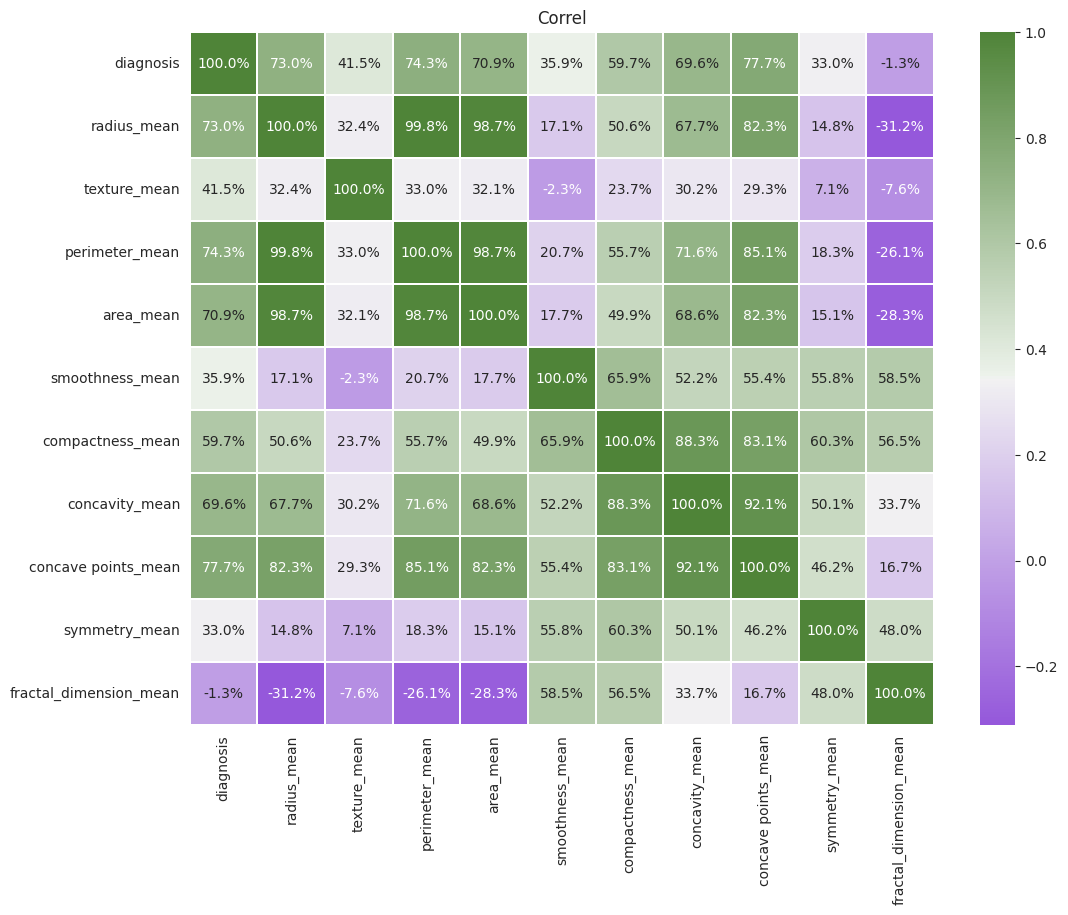

In [25]:
plt.figure(figsize=(12, 9))

plt.title("Correl")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(df[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

In [26]:
plt.figure(figsize=(15, 10))


fig = px.imshow(df[cols].corr());
fig.show()

<Figure size 1500x1000 with 0 Axes>

In [27]:
# modelo de treino e teste
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ml libs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#acuracia, erros e validacao
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

In [28]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [29]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']
targeted_feature = 'diagnosis'
len(prediction_feature)

6

In [30]:
X = df[prediction_feature]
X

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [31]:
y = df.diagnosis
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [32]:
# Divida o conjunto de dados em Conjunto de Treinamento e Conjunto de Teste em 33%
# e defina os 15 registros fixo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)
print(X_train)


     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
274        17.93          115.20      998.9         0.1538           0.07027   
189        12.30           78.83      463.7         0.1667           0.07253   
158        12.06           76.84      448.6         0.1590           0.05241   
257        15.32          103.20      713.3         0.2398           0.22840   
486        14.64           94.21      666.0         0.1409           0.06698   
..           ...             ...        ...            ...               ...   
85         18.46          121.10     1075.0         0.2132           0.10530   
199        14.45           94.49      642.7         0.1950           0.12060   
156        17.68          117.40      963.7         0.1971           0.16650   
384        13.28           85.79      541.8         0.1617           0.08575   
456        11.63           74.87      415.1         0.1799           0.08574   

     concave points_mean  
274         

In [33]:
# Para padronizar características removendo a média e escalando para variância unitária, você pode usar a fórmula para calcular o escore z:

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
# Construção do Modelo
# Agora, estamos prontos para construir nosso modelo de previsão.
# Para isso, criei uma função para construir o modelo, realizar previsões e medir sua precisão.

def model_building(model, X_train, X_test, y_train, y_test):
    """

    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """

    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)

    return (score, accuracy, predictions)

In [35]:
# vamos fazer um dicionario para as predições

models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}

#pra validar:

print(list(models_list.keys()))
print(list(models_list.values()))



['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


In [36]:
# função para plotar os graficos

def cm_metrix_graph(cm):

    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()



In [37]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):

    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )

    print("\n\nClassification Report of '"+ str(name), "'\n")

    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])

    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))


df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.93      0.88      0.90        73

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy            

In [38]:
print(len(confusion_matrixs))

4


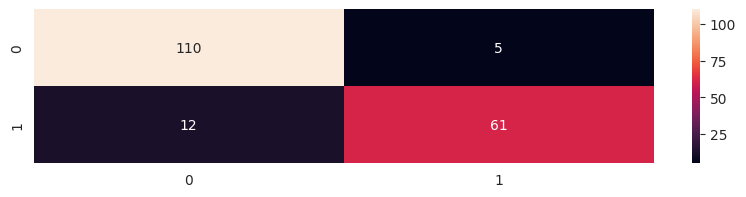

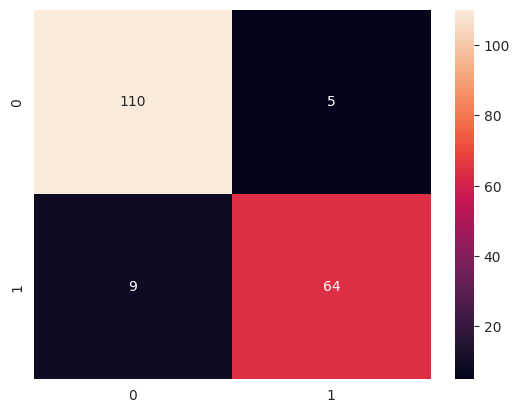

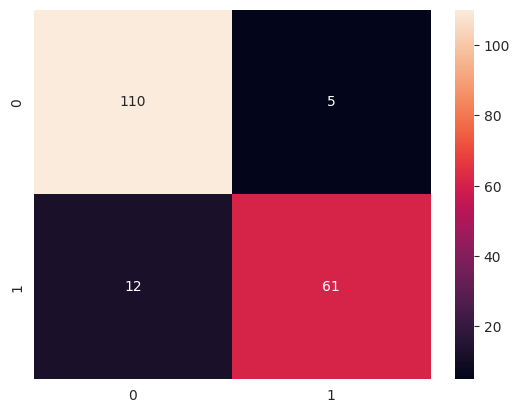

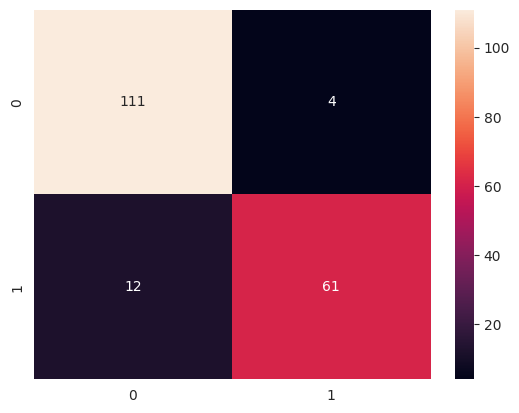

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure(figsize=(10, 2))
# plt.title("Confusion Metric Graph")


for index, cm in enumerate(confusion_matrixs):

#     plt.xlabel("Negative Positive")
#     plt.ylabel("True Positive")



    # Show The Metrics Graph
    cm_metrix_graph(cm) # Call the Confusion Metrics Graph
    plt.tight_layout(pad=True)


In [40]:
df_pred.sort_values('score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
3,SVC,0.923885,0.914894,91.49%
0,LogisticRegression,0.916010,0.909574,90.96%


In [41]:
# Sample For testing only

cv_score = cross_validate(LogisticRegression(), X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

pd.DataFrame(cv_score).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.014042,0.009762,0.007426,0.008436,0.009446,0.017350,0.025254
score_time,3.0,0.003074,0.000900,0.002399,0.002564,0.002728,0.003412,0.004096
test_r2,3.0,0.534312,0.186125,0.325364,0.460291,0.595218,0.638786,0.682353
train_r2,3.0,0.545196,0.051555,0.514363,0.515437,0.516511,0.560613,0.604714
test_neg_mean_squared_error,3.0,-0.108902,0.043669,-0.157895,-0.126316,-0.094737,-0.084405,-0.074074
train_neg_mean_squared_error,3.0,-0.106321,0.012102,-0.113456,-0.113307,-0.113158,-0.102753,-0.092348


In [42]:
def cross_val_scorring(model):

#     (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )

    model.fit(df[prediction_feature], df[targeted_feature])

    # score = model.score(X_train, y_train)

    predictions = model.predict(df[prediction_feature])
    accuracy = accuracy_score(predictions, df[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")


    # inicia k.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds

    err = []

    for train_index, test_index in kFold.split(df):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # separação dos dados via os indices
        X_train = df[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = df[targeted_feature].iloc[train_index] # all targeted features trains

        X_test = df[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = df[targeted_feature].iloc[test_index] # all targeted tests

        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))

        print("Score:", round(np.mean(err),  2) )

In [43]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scorring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.91
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 1.0
Cross Validation Score of'RandomForestClassifier '

Score: 0.99
Score: 0.99
Score: 0.99
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88


In [44]:
from  sklearn.model_selection import GridSearchCV


# grd search

# modelo de arvore de decisao
model = DecisionTreeClassifier()

# ajustando parametros
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }


# GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

gsc.fit(X_train, y_train) # input de modelo

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarn


 Best Score is 
0.9238191632928474

 Best Estinator is 
DecisionTreeClassifier(max_features='log2', min_samples_leaf=10,
                       min_samples_split=9)

 Best Parametes are
{'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 9}


In [45]:
# Pick the model
model = KNeighborsClassifier()


# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9159244264507423

 Best Estinator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=10)

 Best Parametes are
{'leaf_size': 1, 'n_neighbors': 10, 'weights': 'uniform'}


In [46]:
# Pick the model
model = SVC()


# Tunning Params
param_grid = [
              {'C': [1, 10, 100, 1000],
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000],
               'gamma': [0.001, 0.0001],
               'kernel': ['rbf']
              }
]


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9184885290148447

 Best Estinator is 
SVC(C=10, gamma=0.001)

 Best Parametes are
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [47]:
# Pick the model
model = RandomForestClassifier()


# Tunning Params
random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

# Implement GridSearchCV
gsc = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi


 Best Score is 
0.9105937921727396

 Best Estinator is 
RandomForestClassifier(max_depth=40, min_samples_split=5, n_estimators=400)

 Best Parametes are
{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


NameError: name 'Y_train' is not defined